# Graphing Repo For Distribution

<h2> Function to plot the normal distbution graph <h2>

In [1]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import csv
from collections import defaultdict

<h3> The files Processing </h3>

In [13]:
def process_csv(file,location=None):
    counter=defaultdict(int)
    df = pd.read_csv(file)
    if(location==None):
        raw=[i for i in df['Matching'].tolist()]
        for i in df['Matching'].tolist():
            counter[str(i)]+=1
    else:
        matching_scores=df['Matching'].tolist()
        raw=[matching_scores[i] for i in location]
        for i in location:
            counter[str(matching_scores[i])]+=1
    return [int(i) for i in counter.keys()],counter.values(),raw

<h3> the function for graphing </h3>

In [15]:
class Distribution:
    @staticmethod
    #lower bound and upper bound are the actual matching score, not percentage
    def plot(x_axis:list, y_axis:list, raw,
            title=None, x_label=None, y_label=None, legend_label=None, legend_location="best"):
        title        = title        or "Matching Score Distribution"
        x_label      = x_label      or "Matching Scores"
        y_label      = y_label      or "Frequency/Occurance"
        legend_label = legend_label or "Benchmark Mean ={} Std = {}".format(int(np.mean(np.array(raw))),int(np.std(np.array(raw))))
        plt.title(title)
        plt.bar(x_axis, y_axis, 1/1.5, alpha=0.75,label=legend_label,log=True)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc=legend_location)
        return plt

In [4]:
clustered_attack_indices=sorted([i+(j*256) for i in range(129,256) for j in range(0,4)])
clustered_normal_indices=sorted([i+(j*256) for i in range(129) for j in range(0,4)])

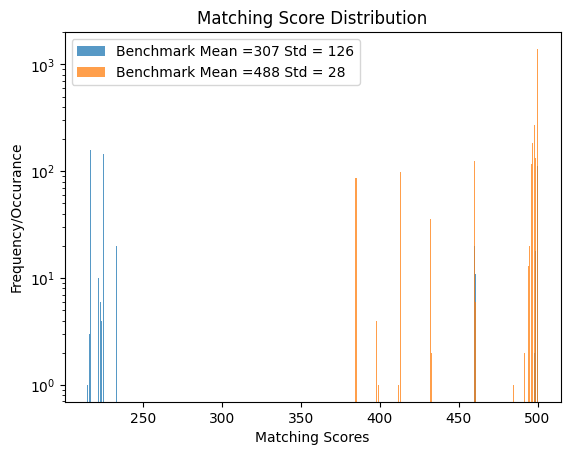

In [16]:
x,y,r1=process_csv("Merge_Sort/MergeSort_Cluster_500.csv",clustered_attack_indices) # change names accordingly
k,j,r2=process_csv("Merge_Sort/MergeSort_Distribution.csv")
plot=Distribution.plot(x,y,r1)
plot=Distribution.plot(k,j,r2)
plot.show()


<h3> Additional Mathematical Functions for Processing Data </h3>

In [ ]:
# CALCULATING THE percision, recall, and accuracy, helper function, do not modify
def metrics(TP,FP,FN,TN,total):
    percision=TP/(TP+FP)
    recall=TP/(TP+FN)
    accuracy=(TP+TN)/total

    return percision,recall,accuracy

def decision_process(decision:list[bool],normal_loc:list[int],attack_loc:list[int]):

    # decision are raw data after decision processing
    # normal locations are iterations not attacked, in forms of index vector
    # attack_loc are iterations are attacked, in forms of index vector
    total=len(decision)
    TP,FP,FN,TN=0

    for i in attack_loc:
        if not decision[i]:
            TP+=1
        else:
            FN+=1
    
    for i in normal_loc:
        if decision[i]:
            TN+=1
        else:
            FP+=1
    
    return metrics(TP,FP,FN,TN,total)

In [17]:
#This function calculates the threathold value for the program

def threathold(datafile:csv, legal_location=None,std=1):
    _,_,raw=process_csv(datafile,legal_location)
    return int(np.mean(np.array(raw)))-std*int(np.std(np.array(raw)))

# The function aims to redo all the decisions based on the std deviation for normal approach

def decisions (datafile: csv, threath: int) -> list[bool]:
    df = pd.read_csv(datafile)
    df['Matching'].tolist()
    return [i>threath for i in df['Matching'].tolist()]
